# Introduction to Bosonic Qiskit

In Bosonic Qiskit, qumodes are the quantum states representing the modes of the electromagnetic field, similar to how qubits represent two-level quantum systems. Qumodes can exist in various states, such as Fock states, which are quantum states with a defined number of photons.

To create a qumode, you need to instantiate a `QumodeRegister`. This register is an abstraction of the `QuantumRegister` and will hold the qumodes in your quantum circuit.

The Bosonic extension of Qiskit's `QuantumCircuit` is the `CVCircuit`. This circuit is designed to work with both qumodes and qubits and provides methods to apply gates and measurements to them.

<br>

### Fock States
Fock states are quantum states with a well-defined number of photons. They are denoted as $|n\rangle$, where n is the number of photons. Fock states are important in quantum optics and quantum information because they represent the most basic quantum states of light.

In a quantum computer, representing a Fock state involves initialising the qumode in a specific state. For example, the Fock state $|1\rangle$ indicates that the qumode has exactly one photon.

To initialise a qumode to a specific Fock state in Bosonic Qiskit, you use the `cv_initialize()` method.

Applying gates to the `CVCircuit` works the same as in Qiskit. All the available gates in Bosonic Qiskit can be found in `circuit.py` in the `c2qa` package. 

In this example we will add the displacement gate, `cv_d()`, to the circuit. The displacement gate is a fundamental operation in bosonic quantum computing. It shifts the state of a qumode in phase space by a specified amount, as a real or complex number. Creating a superposition of Fock states.


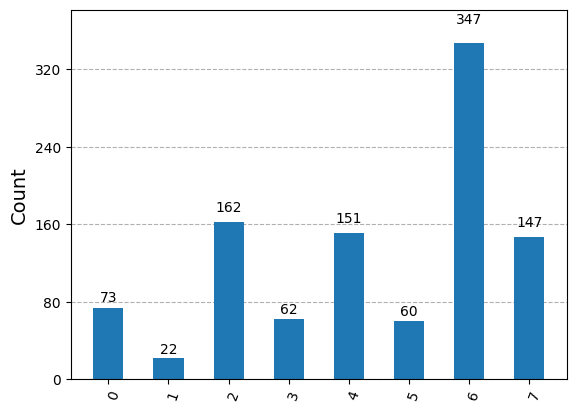

In [7]:
import c2qa
from qiskit import ClassicalRegister, visualization


num_qumodes = 1
num_qubits_per_qumode = 3

# create a qumode register and quantum circuit
qumode_register = c2qa.QumodeRegister(num_qumodes, num_qubits_per_qumode)
classical_register = ClassicalRegister(num_qumodes * num_qubits_per_qumode)

circuit = c2qa.CVCircuit(qumode_register, classical_register)

# initialise the qumode to Fock state |1>
circuit.cv_initialize(1, qumode_register)

# apply a displacement gate
circuit.cv_d(1j, qumode_register)

circuit.cv_measure(qumode_register[0], classical_register) # [0] - measure the first (and only) qumode

# circuit.draw('mpl')

# Simulate the circuit
result = c2qa.util.simulate(circuit)

# print(result)
visualization.plot_histogram(result[2])

This code sets up a qumode, initialises it in the Fock state $|1\rangle$ with 1 photon, applies a displacement gate, and then simulates the circuit to obtain the results, which are then visualised using a histogram. The histogram showing the ($2^{num-qubits-per-qumode}$) 8 possible Fock states of the qumode.